| Feature          | Meaning                                  |
| ---------------- | ---------------------------------------- |
| family_history   | Family history of mental health concerns |
| treatment        | Currently undergoing treatment           |
| Growing_Stress   | Increasing stress levels                 |
| Changes_Habits   | Changes in sleep/diet/routine            |
| Mood_Swings      | Emotional instability                    |
| Coping_Struggles | Difficulty handling daily challenges     |
| Work_Interest    | Interest level in work                   |
| Social_Weakness  | Social withdrawal                        |


In [36]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from prince import MCA
import joblib

In [37]:
data = pd.read_csv("Mental Health Dataset.csv")

In [38]:
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [39]:
data.shape

(292364, 17)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

## Data Visualization

In [41]:
for i in data.columns:
    print(f'\n{data[i].value_counts()}')


Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 16:21    1604
8/27/2014 12:39    1604
                   ... 
8/27/2014 23:54     390
8/27/2014 23:30     390
8/27/2014 23:14     390
8/27/2014 23:10     390
2/1/2016 23:04      390
Name: count, Length: 580, dtype: int64

Gender
Male      239850
Female     52514
Name: count, dtype: int64

Country
United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia         

In [42]:
data.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [43]:
cols = ['Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options']

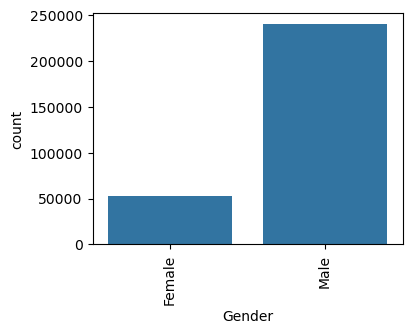

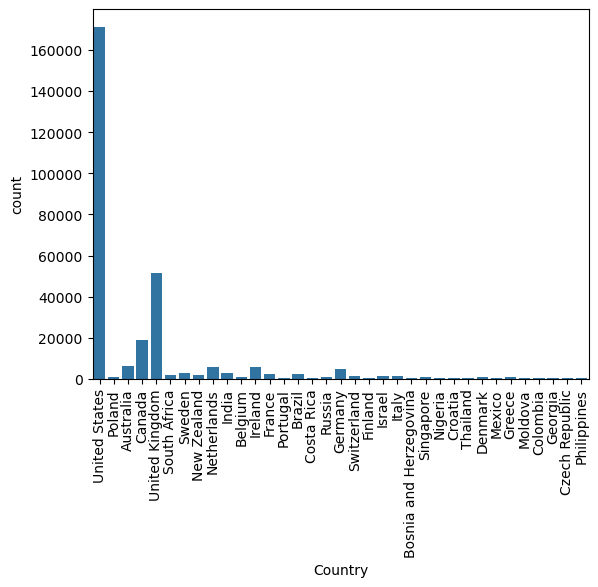

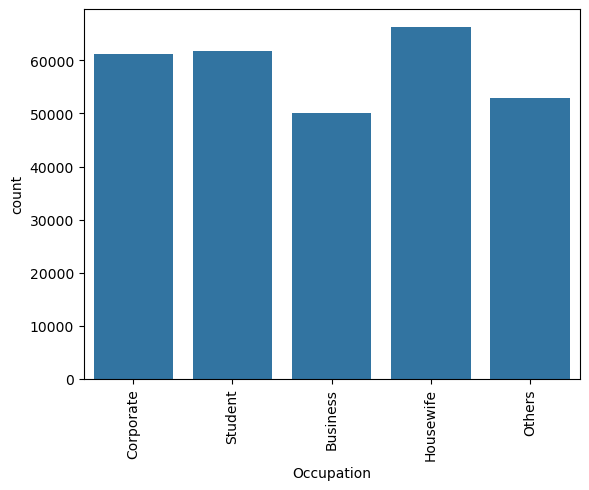

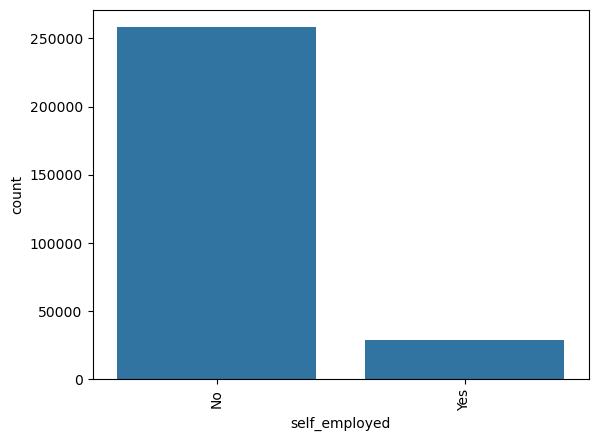

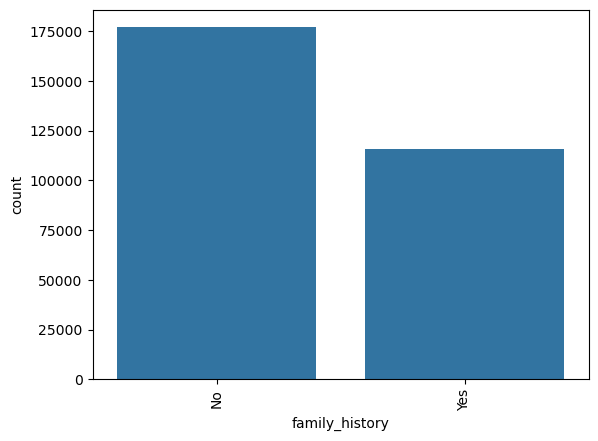

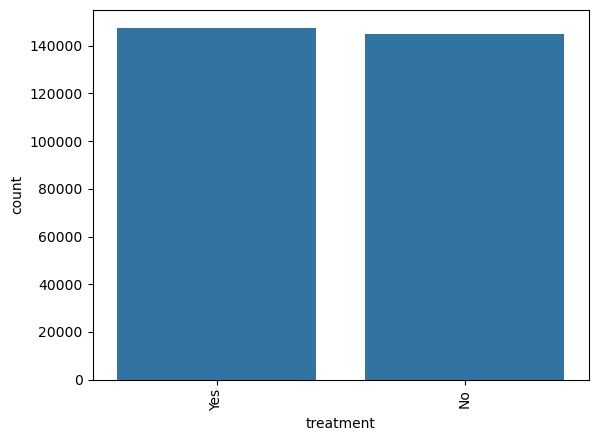

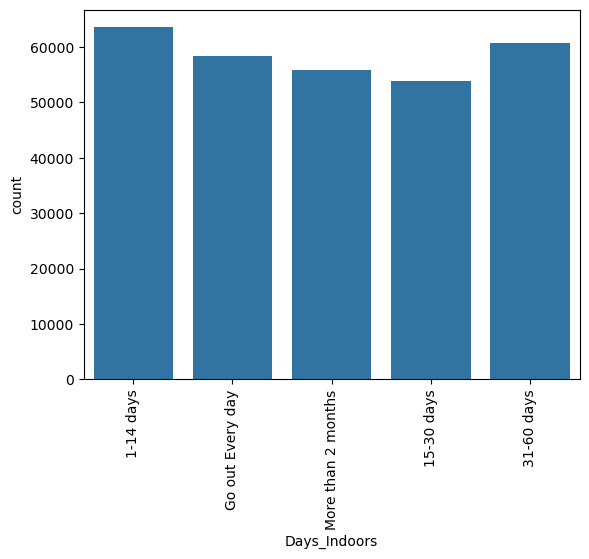

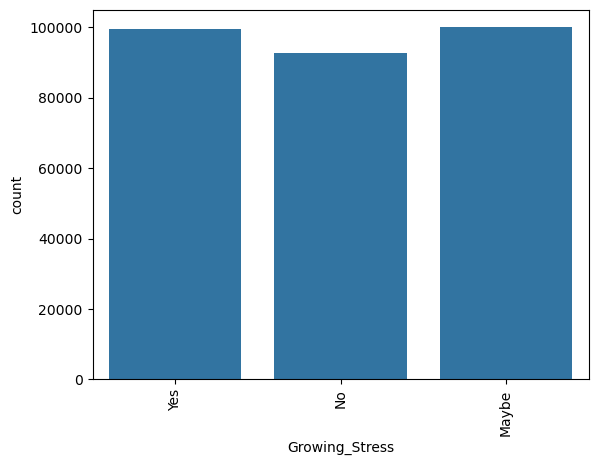

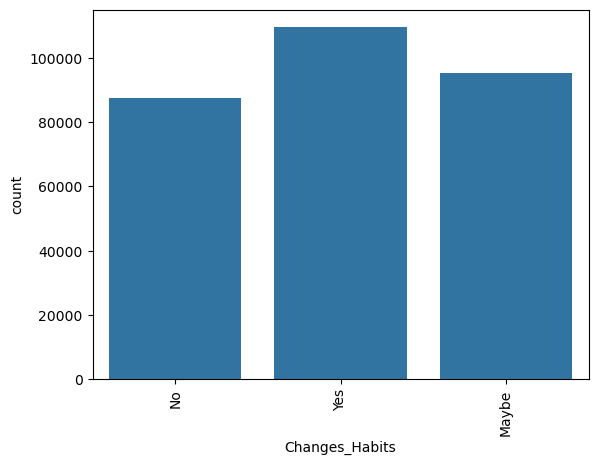

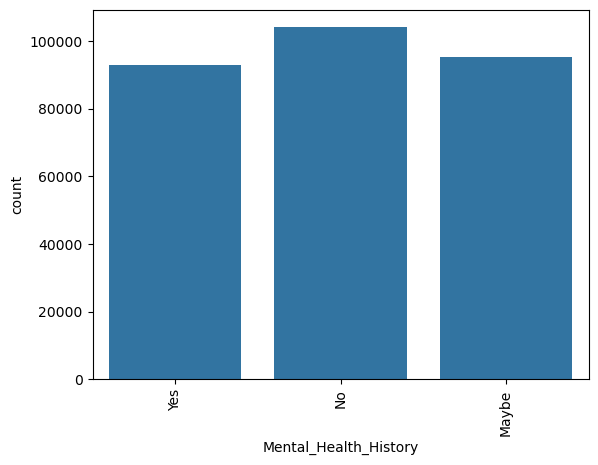

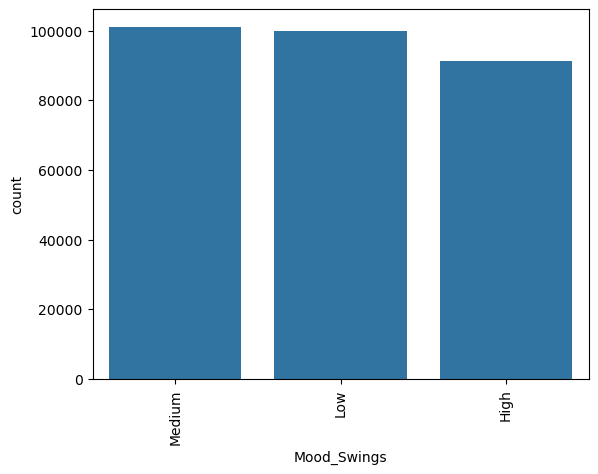

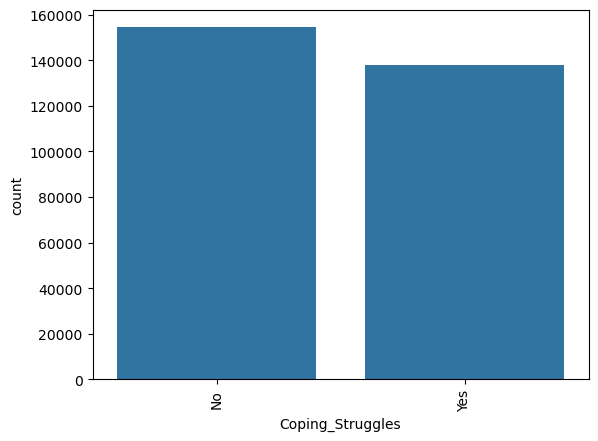

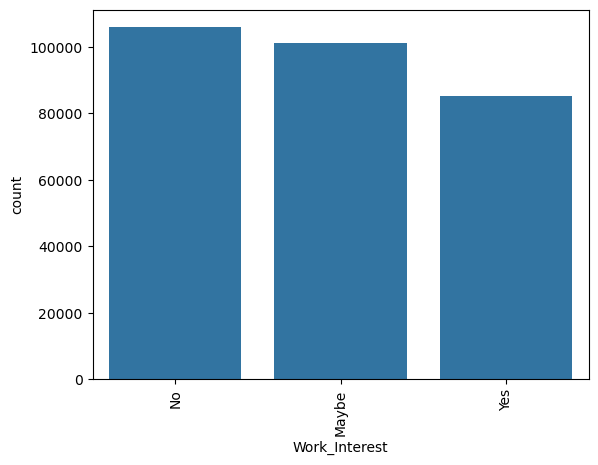

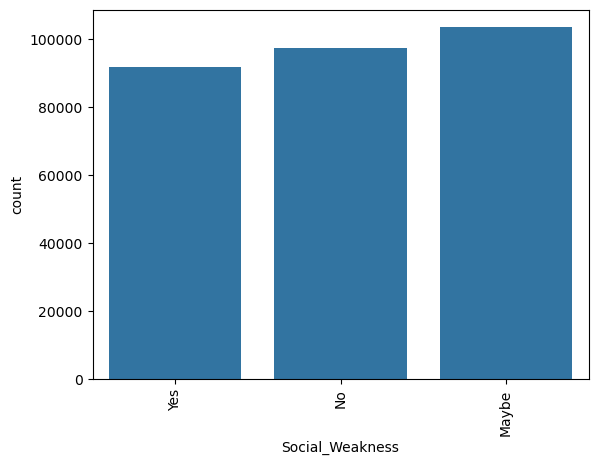

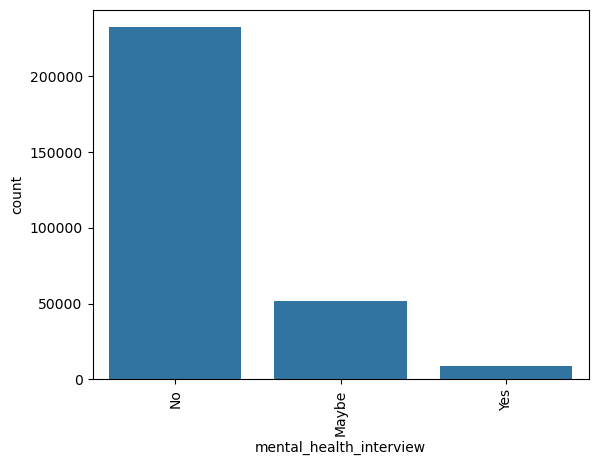

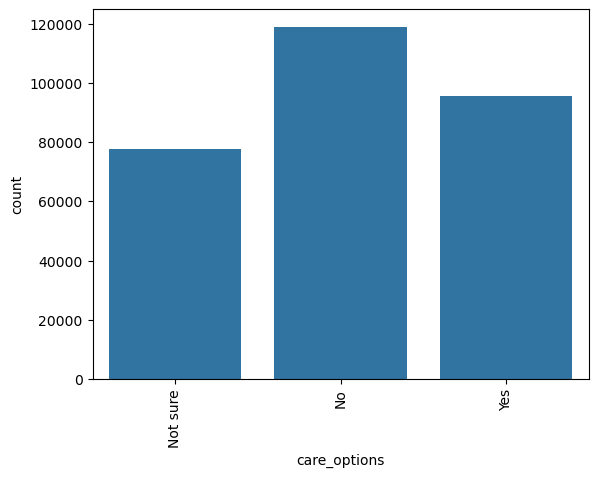

In [44]:
# countplot to check 

plt.figure(figsize=(4,3))
for i in cols:
    sns.countplot(x=i, data=data)
    plt.xticks(rotation=90)
    plt.show()

In [45]:
severity_map = {
    "No": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Yes": 2
}

data["Mood_Swings_Num"] = data["Mood_Swings"].map(severity_map)

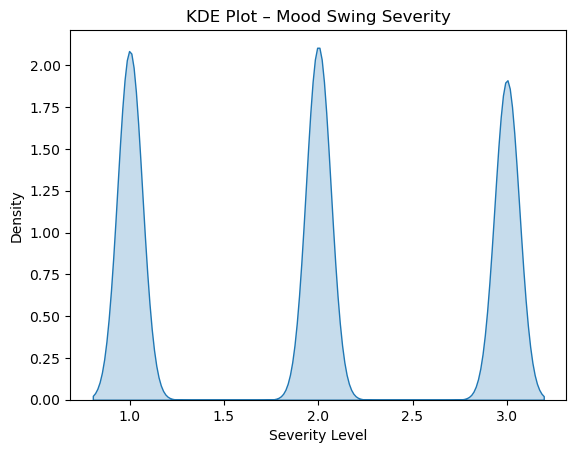

In [46]:
sns.kdeplot(data["Mood_Swings_Num"], fill=True)
plt.title("KDE Plot – Mood Swing Severity")
plt.xlabel("Severity Level")
plt.show()

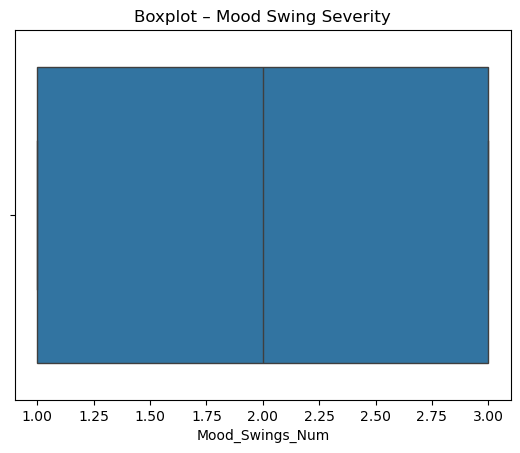

In [47]:
sns.boxplot(x=data["Mood_Swings_Num"])
plt.title("Boxplot – Mood Swing Severity")
plt.show()

## DATA PRE-PROCESSING

In [48]:
# Feature Grouping

context_features = [
    "family_history",
    "treatment"
]

core_symptoms = [
    "Growing_Stress",
    "Changes_Habits",
    "Mood_Swings",
    "Coping_Struggles"
]

functional_impact = [
    "Work_Interest",
    "Social_Weakness"
]

In [49]:
# Create Severity Columns

severity_map = {
    "No": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Yes": 2
}

for col in core_symptoms + functional_impact:
    data[col + "_severity"] = data[col].map(severity_map)

In [50]:
# Create Mental Distress Index (MDI)

data["MDI"] = (
    data["Growing_Stress_severity"] +
    data["Changes_Habits_severity"] +
    data["Mood_Swings_severity"] +
    data["Coping_Struggles_severity"] +
    (3 - data["Work_Interest_severity"]) +
    data["Social_Weakness_severity"]
)

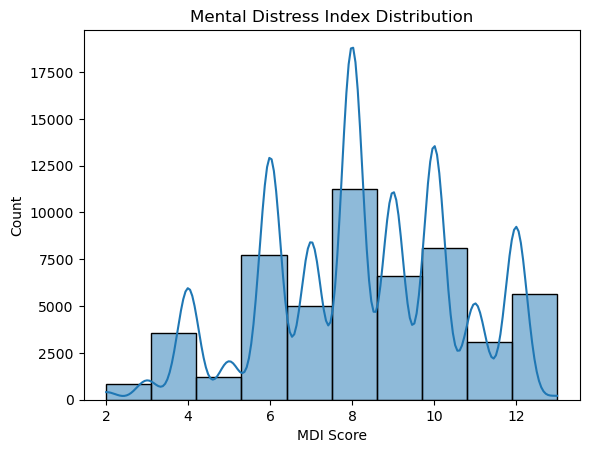

In [51]:
# Let's check distribution of MDI

sns.histplot(data["MDI"], bins=10, kde=True)
plt.title("Mental Distress Index Distribution")
plt.xlabel("MDI Score")
plt.show()

**Inference:**

* MDI creates a continuous severity spectrum
* Higher MDI = higher emotional distress
* This fixes the biggest flaw of pure clustering

In [52]:
# RISK BAND CREATION (CLINICAL SAFETY LAYER)

def assign_risk_band(mdi):
    if mdi >= 10:
        return "High"
    elif mdi >= 6:
        return "Moderate"
    else:
        return "Low"

data["Risk_Band"] = data["MDI"].apply(assign_risk_band)

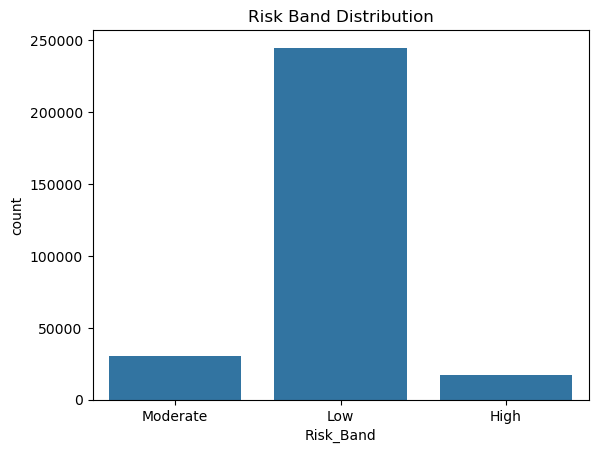

In [53]:
# Let's check distribution of Risk Band
sns.countplot(x="Risk_Band", data=data)
plt.title("Risk Band Distribution")
plt.show()

**Inference:**
* Users are clearly separated into Low / Moderate / High
* High-risk users are now protected from centroid dilution

## DIMENSIONALITY REDUCTION (MCA + PCA VIEW)

### MCA

In [54]:
### MCA Transformation

mca_features = core_symptoms + functional_impact

mca = MCA(n_components=4, random_state=42)
X_mca = mca.fit_transform(data[mca_features].astype(str))

In [55]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.198,10.79%,10.79%
1,0.188,10.24%,21.04%
2,0.187,10.21%,31.24%
3,0.177,9.63%,40.88%


### PCA

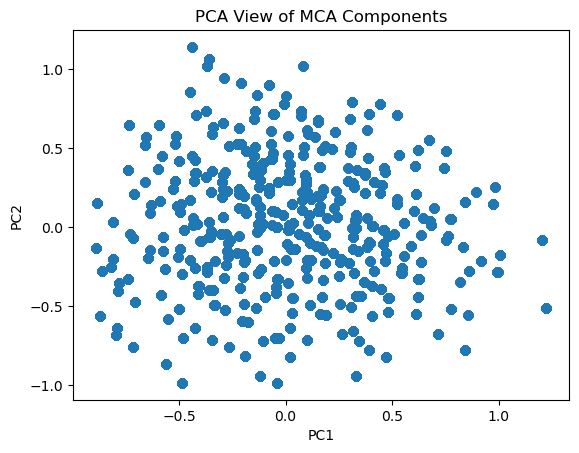

In [56]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4)
plt.title("PCA View of MCA Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [57]:
pca.explained_variance_ratio_.cumsum()

array([0.26407906, 0.514621  ])

**Inference**

* MCA captures meaningful variance from categorical data
* PCA visualization confirms natural grouping tendencies

## MODEL TRAINING

In [58]:
# Weighted MCA Components

X_weighted = X_mca.copy()
X_weighted.iloc[:, :3] = X_weighted.iloc[:, :3] * 2

In [59]:
cluster_models = {}

for band in data["Risk_Band"].unique():
    subset = X_weighted[data["Risk_Band"] == band]

    if band == "Low":
        k = 2
    else:
        k = 3

    model = KMeans(n_clusters=k, random_state=42)
    model.fit(subset)

    cluster_models[band] = model

## Deployment

In [60]:
joblib.dump(mca, "mca_transformer.joblib")
joblib.dump(cluster_models, "risk_band_cluster_models.joblib")
joblib.dump(severity_map, "severity_map.joblib")

['severity_map.joblib']